In [1]:
# Installation des packages nécessaires

!pip install -q wordcloud
#!pip install pyldavis
# Install spaCy (run in terminal/prompt)
import sys
!{sys.executable} -m pip install spacy
# Download spaCy's  'en' Model
!{sys.executable} -m spacy download en

!pip install --upgrade scipy

!pip install gensim

!pip install pyldavis

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
     |████████████████████████████████| 27.4MB 1.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
     |████████████████████████████████| 1.7MB 6.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.3MB 17.5MB/s 
     |████████████████████████████████| 9.9MB 48.0MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136870 sha256=33

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, exp
import pandas as pd
import missingno as msno
from math import *
from scipy import stats
from pydoc import help
from scipy.stats.stats import pearsonr
from scipy.stats import f_oneway
#from scipy.stats import shapiros
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import ShuffleSplit
import glob, os
import seaborn as sns
import pickle
from sklearn.metrics import silhouette_samples, silhouette_score
import missingno as msno
from sklearn.feature_extraction import DictVectorizer
import wordcloud
import nltk
import spacy
from nltk import word_tokenize
import requests
from bs4 import BeautifulSoup
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
from nltk.stem.porter import *
from collections import Counter

sns.set()

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
from google.colab import drive
  
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#path = '/content/drive/MyDrive/Colab_Notebooks/P6/Fichiers'
#all_files = glob.glob(os.path.join(path, "QueryResults*.csv"))
#all_files

In [6]:
0#all_csv = (pd.read_csv(f, sep = ',', error_bad_lines = False, low_memory = False) for f in all_files)
#df_merged = pd.concat(all_csv, ignore_index = True)
#df_merged.to_csv('QueryResults_Merged.csv', index = False)
#!cp QueryResults_Merged.csv '/content/drive/MyDrive/Colab_Notebooks/P6/'

0

In [7]:
df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/P6/QueryResults_Merged.csv",sep = ',',error_bad_lines=False, index_col=None, dtype={'CommunityOwnedDate':'object' })

In [8]:
df.shape
df.reset_index(inplace=True, drop=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Id                     500000 non-null  int64  
 1   PostTypeId             500000 non-null  int64  
 2   AcceptedAnswerId       196985 non-null  float64
 3   ParentId               0 non-null       float64
 4   CreationDate           500000 non-null  object 
 5   DeletionDate           0 non-null       float64
 6   Score                  500000 non-null  int64  
 7   ViewCount              500000 non-null  int64  
 8   Body                   500000 non-null  object 
 9   OwnerUserId            490564 non-null  float64
 10  OwnerDisplayName       9652 non-null    object 
 11  LastEditorUserId       276895 non-null  float64
 12  LastEditorDisplayName  4405 non-null    object 
 13  LastEditDate           281124 non-null  object 
 14  LastActivityDate       500000 non-nu

##### Etape préliminaire : filtre sur les questions (ViewCount -> Nombre de vues / Score -> pertinence)

In [12]:
df=df.sample(n=500000, frac=None, replace=True, weights=None, random_state=1, axis=None)
df.reset_index(inplace=True, drop=True)

In [13]:
df['Score']=df['Score'].astype(int)
df['ViewCount']=df['ViewCount'].astype(int)

In [14]:
#Calcul de la moyenne du nombre de vues par rapport aux différents scores
dftest = ['Score','ViewCount']
dfResult=df.loc[:,dftest]
dfResult['Score']=abs(dfResult['Score'])
res = dfResult.groupby('Score').mean(['ViewCount'])
res['Score'] = res.index

In [15]:
res

AttributeError: ignored

           ViewCount  Score
Score                      
0         315.378955      0
1         557.064610      1
2         790.547713      2
3        1033.016407      3
4        1319.176649      4
...              ...    ...
334    314156.000000    334
413    178446.000000    413
433    155129.000000    433
1124   267238.000000   1124
1989   291381.000000   1989

[170 rows x 2 columns]

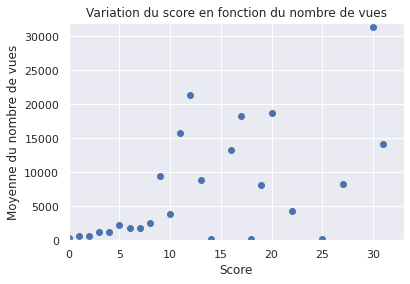

In [ ]:
plt.scatter(res["Score"],res["ViewCount"])
plt.title('Variation du score en fonction du nombre de vues')
plt.xlabel('Score')
plt.ylabel('Moyenne du nombre de vues')
plt.xlim(0, 33)
plt.ylim(0, 32000)

plt.show()

Définition de 2 filtres sur les questions pertinentes : on sélectionne uniquement les posts avec plus de 100 vues et dont le score excède 10 (question pertinente)

In [ ]:
df = df[df['ViewCount'] >= 100]
df = df[df['Score'] >= 1]
df.reset_index(inplace=True, drop=True)

In [ ]:
df.columns

Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'ParentId', 'CreationDate',
       'DeletionDate', 'Score', 'ViewCount', 'Body', 'OwnerUserId',
       'OwnerDisplayName', 'LastEditorUserId', 'LastEditorDisplayName',
       'LastEditDate', 'LastActivityDate', 'Title', 'Tags', 'AnswerCount',
       'CommentCount', 'FavoriteCount', 'ClosedDate', 'CommunityOwnedDate',
       'ContentLicense'],
      dtype='object')

In [ ]:
df.shape

(75327, 23)

In [ ]:
df=df.sample(n=10000, frac=None, replace=True, weights=None, random_state=1, axis=None)
df.reset_index(inplace=True, drop=True)

####1) Analyse exploratoire : prétraitement du texte

In [ ]:
df['Score'].nunique()

29

In [ ]:
df['Title']

0       PyGame separate thread for keyboard input hand...
1       'SklearnClassifier' object has no attribute 'b...
2       C# Console App - This operation requires an in...
3       Returning multiple values from function in pyt...
4       Why can't raw types have methods with generic ...
                              ...                        
9995    Why top:0 with position:absolute not working i...
9996              How to do order by query using firebase
9997          Regex match anything but a specific pattern
9998    Is there a command-line interface to list all ...
9999                   Postgresql equivalent of flashback
Name: Title, Length: 10000, dtype: object

In [ ]:
spacy_nlp = spacy.load('en_core_web_sm')
all_stopwords = spacy_nlp.Defaults.stop_words

tokenizer = RegexpTokenizer(r'\w+')
df['Title_parsed'] = df['Title'].apply(lambda x : tokenizer.tokenize(x))
df['Title_parsed'] = df['Title_parsed'].apply(lambda x : [word for word in x if word.isalpha()])
df['Title_parsed'] = df['Title_parsed'].apply(lambda x : [word for word in x if word not in all_stopwords])

In [ ]:
df['Title_parsed'] 

0       [PyGame, separate, thread, keyboard, input, ha...
1            [SklearnClassifier, object, attribute, NLTK]
2       [C, Console, App, This, operation, requires, i...
3         [Returning, multiple, values, function, python]
4       [Why, t, raw, types, methods, generic, return,...
                              ...                        
9995    [Why, position, absolute, working, element, ma...
9996                        [How, order, query, firebase]
9997                    [Regex, match, specific, pattern]
9998    [Is, command, line, interface, list, Bluetooth...
9999                  [Postgresql, equivalent, flashback]
Name: Title_parsed, Length: 10000, dtype: object

##### 1.1) Stemming

In [ ]:
#Test de la comparaison
#stemmer = PorterStemmer()

#for i in range(len(df)):  
#  for token in df['Title_parsed'][i]:
    #print(token + ' --> ' + stemmer.stem(token))
#    print('Original : %s, New: %s' % (token, stemmer.stem(token)))


##### 1.2) Lemmatization

In [ ]:
#Application de la lemmatisation dans une nouvelle colonne :
#tokens = []
#lemma = []

#for doc in spacy_nlp.pipe(df['Title'].astype('unicode').values, batch_size=50,
#                        n_threads=3):
#    if doc.is_parsed:
#        tokens.append([n.text for n in doc])
#        lemma.append([n.lemma_ for n in doc])
#    else:
#        tokens.append(None)
#        lemma.append(None)
#        pos.append(None)

#df['Title_tokens'] = tokens
#df['Title_lemma'] = lemma

##### 1.3) Application des bag of words

In [ ]:
#df['Title_lemma'] = df['Title_lemma'].apply(lambda x : [word for word in x if word.isalpha()])
#df['Title_lemma'] = df['Title_lemma'].apply(lambda x : [word for word in x if word not in all_stopwords])

In [ ]:
#df['Title_tokens']

In [ ]:
#df['Title_lemma']

In [ ]:
#corpus = []
#for i in range(len(df)):  
#  for token in df['Title_lemma'][i]:
#    corpus.append(token)

##### 1.4) Approche Tfidf avec TfidfVectorizer (Fréquence de mots)

In [ ]:
# create the transform
#vectorizer = TfidfVectorizer()
# tokenize and build vocab
#vectorizer.fit(corpus)
# summarize
#print(vectorizer.vocabulary_)
#print(vectorizer.idf_)
# encode document
#vector = vectorizer.transform([corpus[0]])
# summarize encoded vector
#print(vector.shape)
#print(vector.toarray())

##### 1.5) Approche LDA (non retenu)

In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.decomposition import LatentDirichletAllocation

# Initialise the count vectorizer with the English stop words
#count_vectorizer = CountVectorizer(stop_words='english')# Fit and transform the processed titles
#count_data = count_vectorizer.fit_transform(df['Title_lemma'].apply(lambda s: ' '.join(s)))

In [ ]:
# Load the LDA model from sk-learn
 
# Helper function
#def print_topics(model, count_vectorizer, n_top_words):
#    words = count_vectorizer.get_feature_names()
#    for topic_idx, topic in enumerate(model.components_):
#        print("\nTopic #%d:" % topic_idx)
#        print(" ".join([words[i]
#                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
#number_topics = 5
#number_words = 10# Create and fit the LDA model
#lda = LatentDirichletAllocation(n_components=11, max_iter=5,
#                                learning_method = 'online',
#                                learning_offset = 50.,
#                                random_state = 0,
#                                n_jobs = -1)
#lda.fit(count_data)# Print the topics found by the LDA model

In [ ]:
#print("Topics found via LDA:")

In [ ]:
#print_topics(lda, count_vectorizer, number_words)

####2) Analyse des Tags

In [ ]:
df['Tags'].replace('<', '', regex = True, inplace = True)
df['Tags'].replace('>', ' ', regex = True, inplace = True)

In [ ]:
df['Tags']

0        python multithreading pygame keyboard-events 
1         python-3.x scikit-learn classification nltk 
2                              c# console-application 
3                                              python 
4                                java generics java-8 
                             ...                      
9995                                         html css 
9996      android firebase firebase-realtime-database 
9997       java android regex match regex-lookarounds 
9998    objective-c swift macos bluetooth applescript 
9999                             postgresql flashback 
Name: Tags, Length: 10000, dtype: object

In [ ]:
data_tags_count = df["Tags"].apply(lambda x: len(x.split(" "))) #series.apply(func) invoke function on values of Series.
data_tags = pd.DataFrame()
data_tags =df.copy()
data_tags['Tags_Count'] = data_tags_count
print(data_tags)

            Id  ...  Tags_Count
0     61573664  ...           5
1     40327067  ...           5
2     37278001  ...           3
3     37503864  ...           2
4     53654710  ...           4
...        ...  ...         ...
9995  43514507  ...           3
9996  33976380  ...           4
9997  44346420  ...           6
9998  38116299  ...           6
9999  45673746  ...           3

[10000 rows x 25 columns]


In [ ]:
print("Maximum number of tags per question = "+str(max(data_tags['Tags_Count'])))
print("Minimum number of tags per question = "+str(min(data_tags['Tags_Count'])))
print("Avg number of tags per question = "+str(sum(data_tags['Tags_Count'])/len(data_tags['Tags_Count'])))

Maximum number of tags per question = 6
Minimum number of tags per question = 2
Avg number of tags per question = 3.9399


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


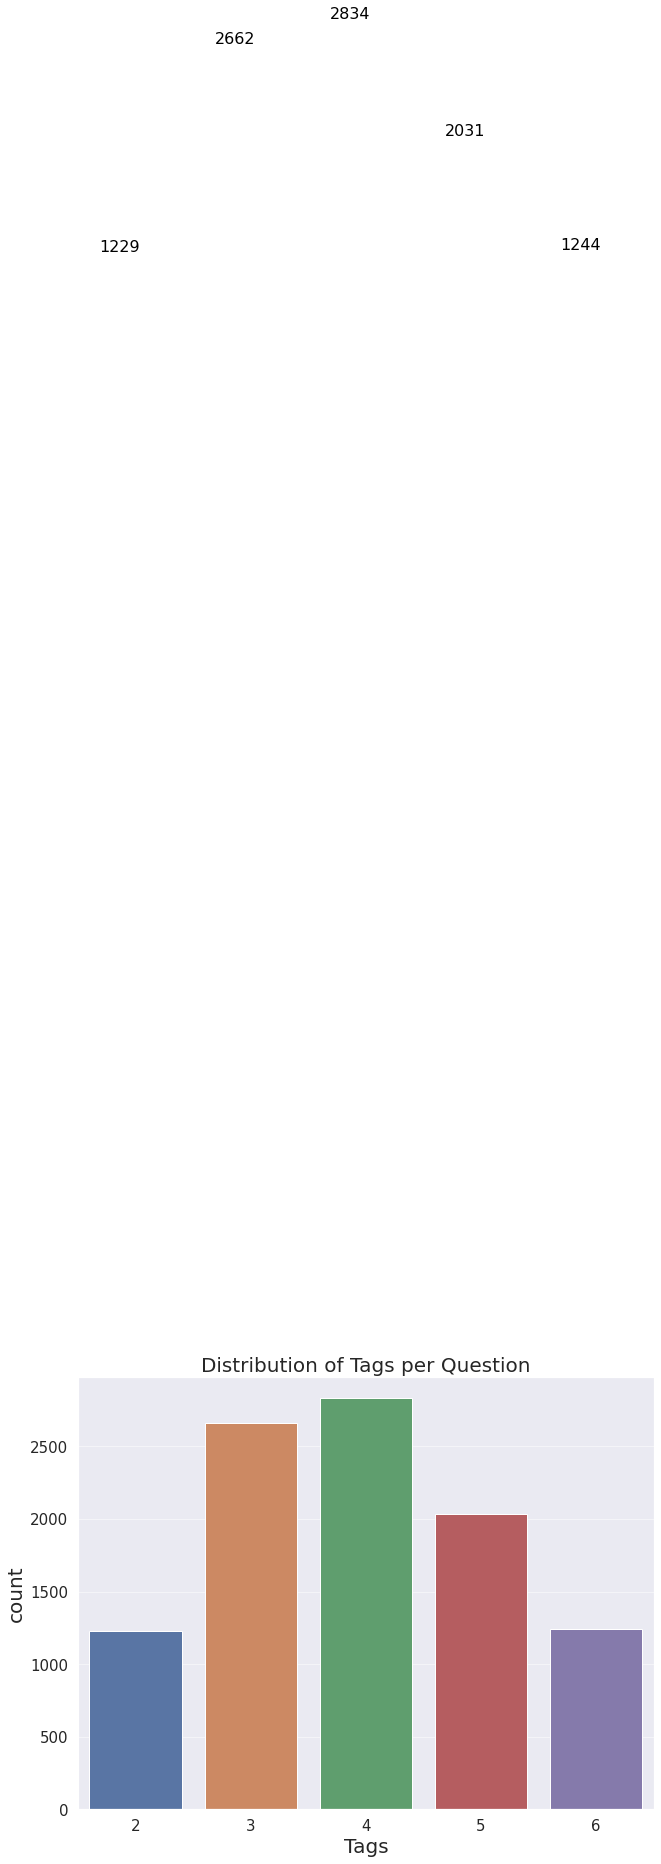

In [ ]:
fig = plt.figure(figsize = (8, 6))
axes = fig.add_axes([0.1,0.1,1,1])
axes.set_title("Distribution of Tags per Question", fontsize = 20)
axes.set_xlabel("Tags", fontsize = 20)
axes.set_ylabel("Count", fontsize = 20)
plt.grid(linestyle='-', linewidth=0.5)
axes.tick_params(labelsize = 15)
sns.countplot(list(data_tags['Tags_Count']), ax = axes)
for i in axes.patches:
    axes.text(i.get_x()+0.09, i.get_height()+9500, str(round(i.get_height(), 2)), fontsize=16, color='black')
plt.show()

In [ ]:
data_tags['Tags_Count'].value_counts()

4    2834
3    2662
5    2031
6    1244
2    1229
Name: Tags_Count, dtype: int64

In [ ]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(" "))

data_bow = vectorizer.fit_transform(df['Tags'])
print("Total number of datapoints = {}".format(data_bow.shape[0]))
print("Total number of unique tags = {}".format(data_bow.shape[1]))

Total number of datapoints = 10000
Total number of unique tags = 636


In [ ]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(" "))
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(' '))
data_bow = vectorizer.fit_transform(data_tags['Tags'])

In [ ]:
#top 10 highest occurring tags


col_sum = data_bow.sum(axis = 0).A1 #data_bow.sum(axis = 0) will sum the column of sparse matrix then .A1 will convert that 
                                    #matrix into array.
feat_count = dict(zip(vectorizer.get_feature_names(), col_sum))
feat_count_sorted = dict(sorted(feat_count.items(), key = lambda x: x[1], reverse = True))
count_data = {"Tags":list(feat_count_sorted.keys()), "Count": list(feat_count_sorted.values())}
count_df = pd.DataFrame(data = count_data)
count_df.drop([0], inplace = True)
#count_df[:30]

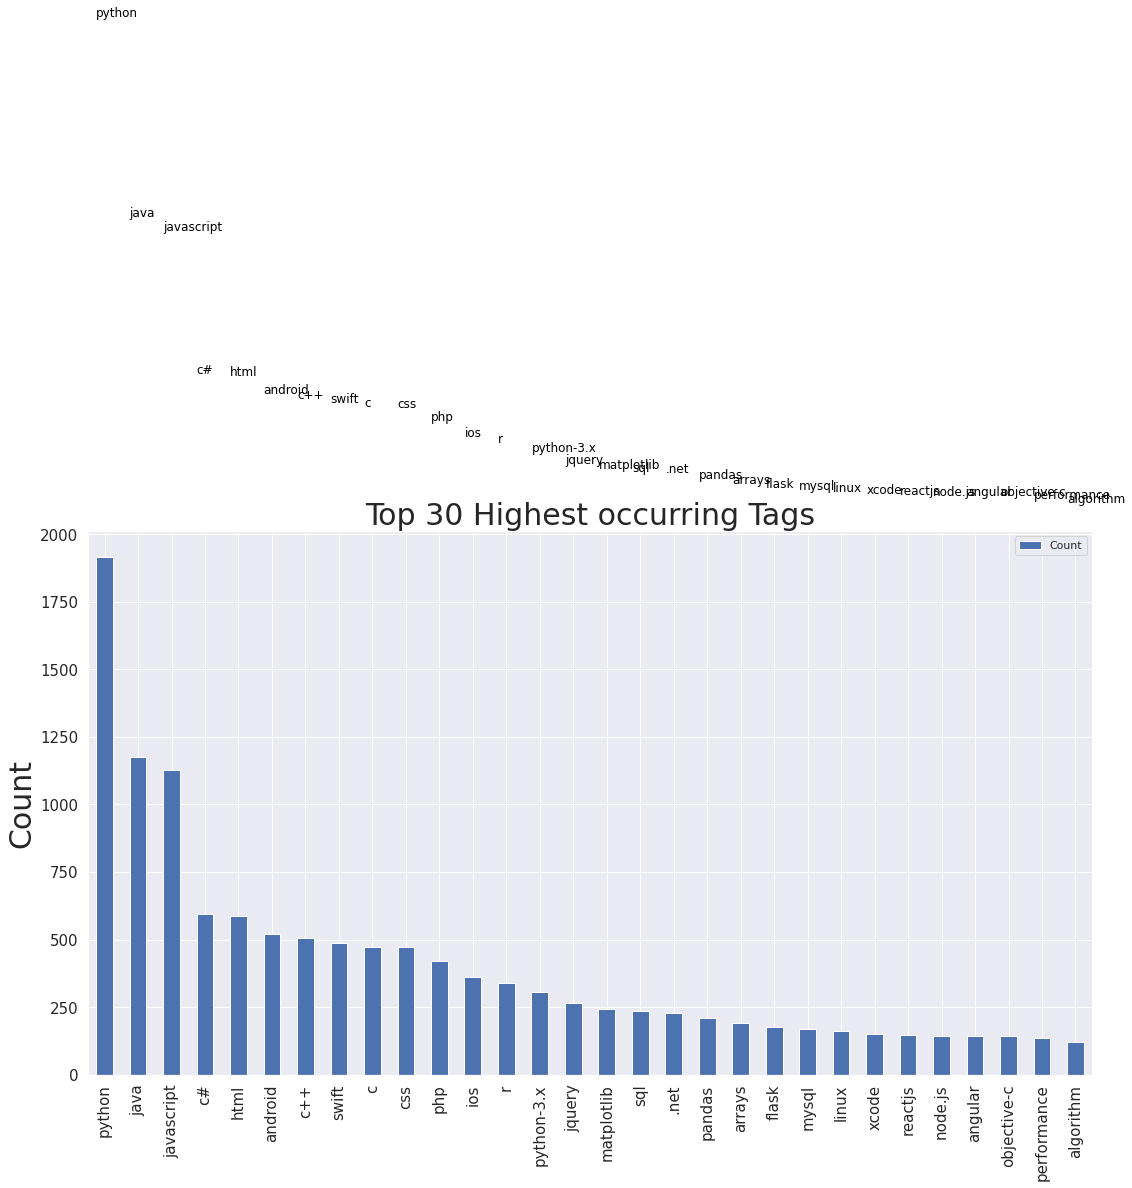

In [ ]:
axes = count_df.head(30).plot(x = 'Tags', y = 'Count', kind = 'bar', figsize = (18, 10), fontsize = 15, grid = True)
plt.xlabel("")
plt.ylabel("Count", fontsize = 30)
plt.title("Top 30 Highest occurring Tags", fontsize = 30)
cnt = 1
top30tags=[]
for i in axes.patches:
    axes.text(i.get_x(), i.get_height()+2000, count_df.head(30)['Tags'][cnt], fontsize=12, color='black')
    top30tags.append(count_df.head(30)['Tags'][cnt])
    cnt +=1

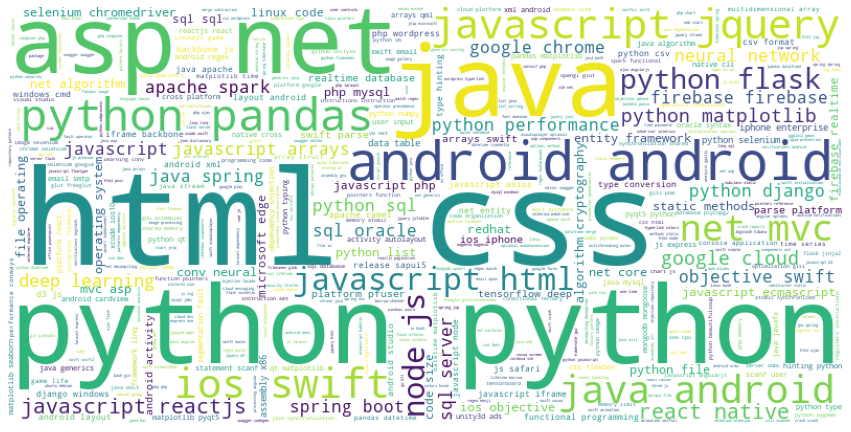

In [ ]:
plt.figure(figsize = (15,10))
long_string = ' '.join(list(df['Tags'].values))
wordcloud = WordCloud(background_color = "white", max_words = 5000, contour_width = 3, width= 800, height = 400, contour_color = 'steelblue')
wordcloud.generate(long_string)
plt.axis("off")
plt.imshow(wordcloud)

In [ ]:
top30tags

['python',
 'java',
 'javascript',
 'c#',
 'html',
 'android',
 'c++',
 'swift',
 'c',
 'css',
 'php',
 'ios',
 'r',
 'python-3.x',
 'jquery',
 'matplotlib',
 'sql',
 '.net',
 'pandas',
 'arrays',
 'flask',
 'mysql',
 'linux',
 'xcode',
 'reactjs',
 'node.js',
 'angular',
 'objective-c',
 'performance',
 'algorithm']

In [ ]:
def clean_alt_list(list_):
 list_ = '["'+list_+'"]'
 list_ =  list_.replace(' ','","')  
 return list_

def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

df["Tags_list"] = df["Tags"].apply(clean_alt_list)
df["Tags_list"] = df["Tags_list"].apply(eval)

In [ ]:
df['Tags_list']

0       [python, multithreading, pygame, keyboard-even...
1       [python-3.x, scikit-learn, classification, nlt...
2                             [c#, console-application, ]
3                                              [python, ]
4                              [java, generics, java-8, ]
                              ...                        
9995                                        [html, css, ]
9996    [android, firebase, firebase-realtime-database, ]
9997    [java, android, regex, match, regex-lookaround...
9998    [objective-c, swift, macos, bluetooth, applesc...
9999                            [postgresql, flashback, ]
Name: Tags_list, Length: 10000, dtype: object

#### 3) Transformation des 30 tags les plus représentés : analyse supervisée

##### 3.1) Transformation avec MultiLabelBinarizer


In [ ]:
#from sklearn.preprocessing import MultiLabelBinarizer

#mlb = preprocessing.MultiLabelBinarizer(classes=(top30tags))
#mlb.fit_transform(df['Tags_list'])
#list(mlb.classes_)
#res = mlb.transform(df['Tags_list'])
#tags = pd.DataFrame(res,columns="Tag_"+mlb.classes_)

#df = pd.concat([df,tags], axis=1)

In [ ]:
#from sklearn.feature_extraction.text import TfidfTransformer
#tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
#X_train_tf = tf_transformer.transform(X_train_counts)
#X_train_tf.shape

#### 4) Préparation à l'approche supervisée

###### 4.1) Concaténation title + body

In [ ]:
df['Concat_body_title'] = df['Body'] + df['Title']

In [ ]:
df['Concat_body_title'] = df['Concat_body_title'].str.lower()

In [ ]:
df['Concat_body_title']

0       <p>i am making a game with snake-like movement...
1       <p>i'm trying to classify datas using nltk's s...
2       <p>i have a c# console that is scheduled to ex...
3       <p>i'm trying to get some help in returning va...
4       <p>consider the following class</p>\n\n<pre><c...
                              ...                        
9995    <p>why <code>top:0</code> with <code>position:...
9996    <p>i'm using firebase on my android app. i nee...
9997    <p>i need a regex, that matches anything but t...
9998    <p>i want to list all in-range bluetooth devic...
9999    <p>i'm oracle dba and want to learn postgresql...
Name: Concat_body_title, Length: 10000, dtype: object

##### 4.2) Nettoyage de la nouvelle variable concaténée

###### 4.2.1) 1- Nettoyage des balises dans Body / Tokenizer / Lemmatizer / Nettoyage bag of words

In [ ]:
def cleanHtml(html) :
    soup = BeautifulSoup(html, "html.parser")
    for script in soup(["script", "style"]):
        script.extract()
    text = soup.get_text()
    lines = (line.strip() for line in text.splitlines())
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    cleantext = '\n'.join(chunk for chunk in chunks if chunk)
    return cleantext

def cleanPunc(sentence) :
    cleaned = re.sub(r'[?|!|\'|"|#|@]', r'',sentence)
    cleaned = re.sub(r'[.|,|;|:|}|{|)|(|\|/]', r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keepAlpha(sentence) :
    alpha_sentence = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sentence += alpha_word
        alpha_sentence += " "
    alpha_sentence = alpha_sentence.strip()
    return alpha_sentence


stop_words = set(stopwords.words('english'))
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)

def cleanStopwords(sentence) :
  global re_stop_words
  return re_stop_words.sub(" ", sentence)

def lemmatization(sentence):
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in sentence.split()]
    return text



In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

df['Concat_body_title_cleaned'] = df['Concat_body_title'].apply(cleanHtml)
df['Concat_body_title_cleaned'] = df['Concat_body_title_cleaned'].apply(cleanPunc)
df['Concat_body_title_cleaned'] = df['Concat_body_title_cleaned'].apply(keepAlpha)
df['Concat_body_title_cleaned'] = df['Concat_body_title_cleaned'].apply(cleanStopwords)
df['Concat_body_title_cleaned'] = df['Concat_body_title_cleaned'].apply(lemmatization)
df['Concat_body_title_cleaned'] = df['Concat_body_title_cleaned'].apply(lambda x: ' '.join(map(str, x)))

In [ ]:
df['Concat_body_title_cleaned']

0       making game snake like movement think best way...
1       im trying classify data using nltks sklearncla...
2       c console scheduled execute window task schedu...
3       im trying get help returning value year calc f...
4       consider following class class foo list string...
                              ...                        
9995    top position absolute working want mention con...
9996    im using firebase android app need help find i...
9997    need regex match anything pattern ignored patt...
9998    want list range bluetooth device ideally hostn...
9999    im oracle dba want learn postgresql equivalent...
Name: Concat_body_title_cleaned, Length: 10000, dtype: object

In [ ]:
df['num_words'] = df['Concat_body_title_cleaned'].apply(lambda x: len(x.split()))
df['num_stopwords'] = df['Concat_body_title_cleaned'].apply(lambda x: len([word for 
                                                            word in x.split() if word in stop_words]))
df['num_sentences'] = df['Concat_body_title_cleaned'].apply(lambda x: len(x.split('.')))

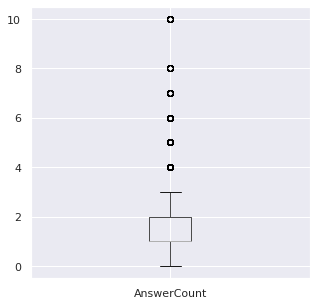

In [ ]:
df.boxplot(column='AnswerCount',figsize=(5,5))

##### 4.3) Préparation du Train test split. Définition du Y : 30 tags les plus représentées

In [ ]:
multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(df['Tags'])

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = preprocessing.MultiLabelBinarizer(classes=(top30tags))
mlb.fit_transform(df['Tags_list'])
list(mlb.classes_)
res = mlb.transform(df['Tags_list'])
y_bin = pd.DataFrame(res,columns="Tag_"+mlb.classes_)

#df = pd.concat([df,tags], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:987: UserWarning: unknown class(es) ['', '.bash-profile', '.htaccess', '.net-4.0', '.net-4.5', '.net-5', '.net-assembly', '.net-core', '.net-core-2.0', '.net-core-3.0', '.net-core-3.1', '.net-standard', '.so', '2checkout', '2d', '2d-games', '32-bit', '3d', '3dtouch', '4d', '64-bit', 'a-star', 'abi', 'abstract', 'abstract-class', 'abstract-function', 'abstract-syntax-tree', 'abstraction', 'accelerated-c++', 'access-denied', 'access-modifiers', 'access-violation', 'accordion', 'accumarray', 'achievements', 'ackermann', 'acr', 'acrobat', 'action', 'actionresult', 'actions-on-google', 'activemq', 'activerecord', 'activestate', 'activity-diagram', 'activity-stack', 'actor', 'actor-model', 'ada', 'adapter', 'adb', 'adb-shell', 'add', 'add-in', 'add-on', 'addeventlistener', 'address-operator', 'addressof', 'adjacency-matrix', 'admin', 'admob', 'admob-rewardedvideoad', 'ado.net', 'adobe', 'adodb', 'ads', 'ads-api', 'adsense

#### 5) Train test split : X (concaténation title + body) / Y (les 30 tags les plus représentés)


In [ ]:
from sklearn.model_selection import train_test_split

X=df
y=y_bin

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 30) (2000, 30) (8000, 30) (2000, 30)


In [ ]:
with open('/content/drive/MyDrive/Colab_Notebooks/P6/FinalTrain10K.pkl','wb') as f:
    pickle.dump(X_train, f)
with open('/content/drive/MyDrive/Colab_Notebooks/P6/FinalTest10K.pkl','wb') as f:
    pickle.dump(X_test, f)

##### 5.1) TfIdf sur le jeu de données train

In [ ]:
#vectorizer = TfidfVectorizer(analyzer = 'word',
#                                       min_df=0.0,
#                                       max_df = 1.0,
#                                       strip_accents = None,
#                                       encoding = 'utf-8', 
#                                       preprocessor=None,
#                                       token_pattern=r"(?u)\S\S+",
#                                       max_features=5000)

#X_train_vectorized = vectorizer.fit_transform(X_train['Concat_body_title_cleaned'])
#X_test_vectorized = vectorizer.transform(X_test['Concat_body_title_cleaned'])

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 30) (2000, 30) (8000, 30) (2000, 30)


In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
reviews = list(X_train['Concat_body_title_cleaned'])
reviews_test = list(X_test['Concat_body_title_cleaned'])

tfidf_reviews = vectorizer.fit_transform(reviews)
tfidf_reviews_test = vectorizer.transform(reviews_test)

In [ ]:
with open('/content/drive/MyDrive/Colab_Notebooks/P6/tfidfTrain10K.pkl','wb') as f:
    pickle.dump(tfidf_reviews, f)

In [ ]:
tfidf_reviews.shape

(8000, 5000)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 30) (2000, 30) (8000, 30) (2000, 30)


In [ ]:
X_train['Concat_body_title_cleaned']

0       using bootstrap datetime picker way set time r...
1       data frame r simplicity one column want separa...
2       dont really understand difference private void...
3       line header file typedef struct mystruct mystr...
4       receiving date format server simpledateformatt...
                              ...                        
7995    struct name member c actual c statement came a...
7996    one would recommend sas lint style lint seem s...
7997    want modify javascript array element value spe...
7998    seeing strange issue converting data time epoc...
7999    fix page level corruption sql database facing ...
Name: Concat_body_title_cleaned, Length: 8000, dtype: object

In [ ]:
X_test['Concat_body_title_cleaned']

0       written perl script take input hexadecimal val...
1       im trying build table based selected property ...
2       trying submit jdbc jar spark shell initial ana...
3       trying format time coming odata xml look like ...
4       wondering anyone used database repository conn...
                              ...                        
1995    making native application android using xamari...
1996    whats simple way documentation random initials...
1997    angular cli documentation seem contain full re...
1998    trying extract date string new date string ret...
1999    need help copying file using command line robo...
Name: Concat_body_title_cleaned, Length: 2000, dtype: object

In [ ]:
tfidf_array = tfidf_reviews.toarray()
tfidf_array_test = tfidf_reviews_test.toarray()
print("Shape of the array:",tfidf_array.shape)

Shape of the array: (8000, 5000)


In [ ]:
print(tfidf_array.shape, tfidf_array_test.shape)

(8000, 5000) (2000, 5000)


##### 5.2) ACP sur le jeu de données

In [ ]:
print("Percentage of zeros:",
     np.count_nonzero(tfidf_array==0)/(tfidf_array.shape[0]*tfidf_array.shape[1])*100)
#only 0.84% of the array elements are non zero. Such a waste of space!

Percentage of zeros: 99.14291750000001


In [ ]:
pca = PCA(.80)
pca.fit(tfidf_array)
X_train_vectorized = pca.transform(tfidf_array)
X_test_vectorized = pca.transform(tfidf_array_test)

In [ ]:
#On passe de 5000 à 1596 colonnes qui expliquent 80% de la variaance soit une réduction 69% de la taille du df
tfidf_array.shape

(8000, 5000)

In [ ]:
X_train_vectorized.shape

(8000, 1312)

In [ ]:
with open('/content/drive/MyDrive/Colab_Notebooks/P6/pca10K.pkl','wb') as f:
    pickle.dump(pca, f)

In [ ]:
print(X_train_vectorized.shape, X_test_vectorized.shape)

(8000, 1312) (2000, 1312)


In [ ]:
#NUM_COMPONENTS = 2000
#pca = PCA(NUM_COMPONENTS)
#reduced = pca.fit_transform(tfidf_array)

In [ ]:
#variance_explained = np.cumsum(pca.explained_variance_)

In [ ]:
#fig, ax = plt.subplots(figsize=(15, 8))
#plt.plot(range(NUM_COMPONENTS),variance_explained, color='r')
#ax.grid(True)
#plt.xlabel("Number of components")
#plt.ylabel("Cumulative explained variance")
#It takes around 700 components to explain 60% of variance. While 300 components post that explain only 40%

In [ ]:
#NUM_COMPONENTS = 3
#pca = PCA(NUM_COMPONENTS)
#reduced = pca.fit_transform(tfidf_array)

In [ ]:
#dfNew = pd.DataFrame(reduced,columns=['A','B','C'])
#dfNew['Score'] = df['Score']

In [ ]:
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111, projection='3d')
#ax.view_init(20, 40)
#ax.scatter(dfNew[dfNew['Score']==1]['A'], dfNew[dfNew['Score']==1]['B'], dfNew[dfNew['Score']==1]['C'],marker = 'o')
#ax.scatter(dfNew[dfNew['Score']==0]['A'], dfNew[dfNew['Score']==0]['B'], dfNew[dfNew['Score']==0]['C'],marker = '^')
#ax.set_xlabel('X')
#ax.set_ylabel('Y')
#ax.set_zlabel('Z')
#ax.text2D(0.05, 0.95, "PCA for n=3 components", transform=ax.transAxes)

Sauvegarde des données

In [ ]:
with open('/content/drive/MyDrive/Colab_Notebooks/P6/FinalTrainVectorized10K.pkl','wb') as f:
    pickle.dump(X_train_vectorized, f)
with open('/content/drive/MyDrive/Colab_Notebooks/P6/FinalTestVectorized10K.pkl','wb') as f:
    pickle.dump(X_test_vectorized, f)
with open('/content/drive/MyDrive/Colab_Notebooks/P6/FinalTrainLabels10K.pkl','wb') as f:
    pickle.dump(y_train, f)
with open('/content/drive/MyDrive/Colab_Notebooks/P6/FinalTestLabels10K.pkl','wb') as f:
    pickle.dump(y_test, f)
with open('/content/drive/MyDrive/Colab_Notebooks/P6/mlb10K.pkl','wb') as f:
    pickle.dump(mlb, f)
with open('/content/drive/MyDrive/Colab_Notebooks/P6/Vectorizer10K.pkl','wb') as f:
    pickle.dump(vectorizer, f)


#### 6) LDA sur le nouveau jeu de données (non retenu)

---



In [ ]:
corpus_title = X_train['Title'].apply(lambda x: x.split())
text_title = X_train['Title'].apply(lambda x: x.split())
corpus_body = X_train['Body'].apply(lambda x: x.split())
text_body = X_train['Body'].apply(lambda x: x.split())
corpus_merged = X_train['Concat_body_title_cleaned'].apply(lambda x: x.split())
text_merged = X_train['Concat_body_title_cleaned'].apply(lambda x: x.split())

In [ ]:
%%time
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora

# Create Dictionary
id2word_title = corpora.Dictionary(corpus_title)
id2word_body = corpora.Dictionary(corpus_body)
id2word_merged = corpora.Dictionary(corpus_merged)

# Create Corpus
texts_title = corpus_title
texts_body = corpus_body
texts_merged = corpus_merged

# Term Document Frequency
corpus_title = [id2word_title.doc2bow(text) for text in corpus_title]
corpus_body = [id2word_body.doc2bow(text) for text in corpus_body]
corpus_merged = [id2word_merged.doc2bow(text) for text in corpus_merged]

# View
print(corpus_title[:1], corpus_body[:1], corpus_merged[:1])


def compute_coherence_values(dictionary, corpus, texts, id2word, limit, start = 2, step = 4):
    coherence_values = []
    model_list = []
    nb_topics = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus = corpus, num_topics = num_topics, id2word = id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model = model, texts = texts, dictionary = dictionary, coherence = 'c_v')
        coherence_values.append(coherencemodel.get_coherence())
        nb_topics.append(num_topics)

    return model_list, coherence_values, nb_topics

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]] [[(0, 2), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 3), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 3), (33, 1), (34, 1), (35, 1), (36, 1)]] [[(0, 2), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 2), (11, 2), (12, 1), (13, 1), (14, 2), (15, 3), (16, 1), (17, 1), (18, 1)]]
CPU times: user 3.52 s, sys: 48.7 ms, total: 3.57 s
Wall time: 3.56 s


In [ ]:
%%time
import gensim

model_list_title, coherence_values_title, nb_topics = compute_coherence_values(dictionary = id2word_title, corpus = corpus_title, texts = text_title, start = 2, limit = 51, step = 4, id2word = id2word_title)
score_title = pd.DataFrame(list(zip(nb_topics, coherence_values_title)), columns = ['Nb of topics', 'Coherence Score'])
print(score_title.to_string(index = False))


 Nb of topics  Coherence Score
            2         0.174874
            6         0.218424
           10         0.240319
           14         0.254143
           18         0.260973
           22         0.290337
           26         0.286715
           30         0.309101
           34         0.319798
           38         0.326914
           42         0.343650
           46         0.328848
           50         0.347542
CPU times: user 1min 14s, sys: 1min 3s, total: 2min 18s
Wall time: 1min 56s


In [ ]:
%%time

model_list_body, coherence_values_body, nb_topics = compute_coherence_values(dictionary = id2word_body, corpus = corpus_body, texts = text_body, start = 2, limit = 51, step = 4, id2word = id2word_body)
score_body = pd.DataFrame(list(zip(nb_topics, coherence_values_body)), columns = ['Nb of topics', 'Coherence Score'])
print(score_body.to_string(index = False))

 Nb of topics  Coherence Score
            2         0.504196
            6         0.455678
           10         0.441179
           14         0.469605
           18         0.463126
           22         0.471577
           26         0.464317
           30         0.459289
           34         0.455339
           38         0.459879
           42         0.457616
           46         0.469317
           50         0.457529
CPU times: user 13min 28s, sys: 1h 9min 28s, total: 1h 22min 57s
Wall time: 6min 35s


In [ ]:
%%time

model_list_merged, coherence_values_merged, nb_topics = compute_coherence_values(dictionary = id2word_merged, corpus = corpus_merged, texts = text_merged, start = 2, limit = 51, step = 4, id2word = id2word_merged)
score_merged = pd.DataFrame(list(zip(nb_topics, coherence_values_merged)), columns = ['Nb of topics', 'Coherence Score'])
print(score_merged.to_string(index = False))

 Nb of topics  Coherence Score
            2         0.386154
            6         0.415077
           10         0.437265
           14         0.463117
           18         0.431483
           22         0.477285
           26         0.461720
           30         0.459568
           34         0.438111
           38         0.461144
           42         0.429239
           46         0.442551
           50         0.447405
CPU times: user 5min 23s, sys: 20min 59s, total: 26min 23s
Wall time: 4min


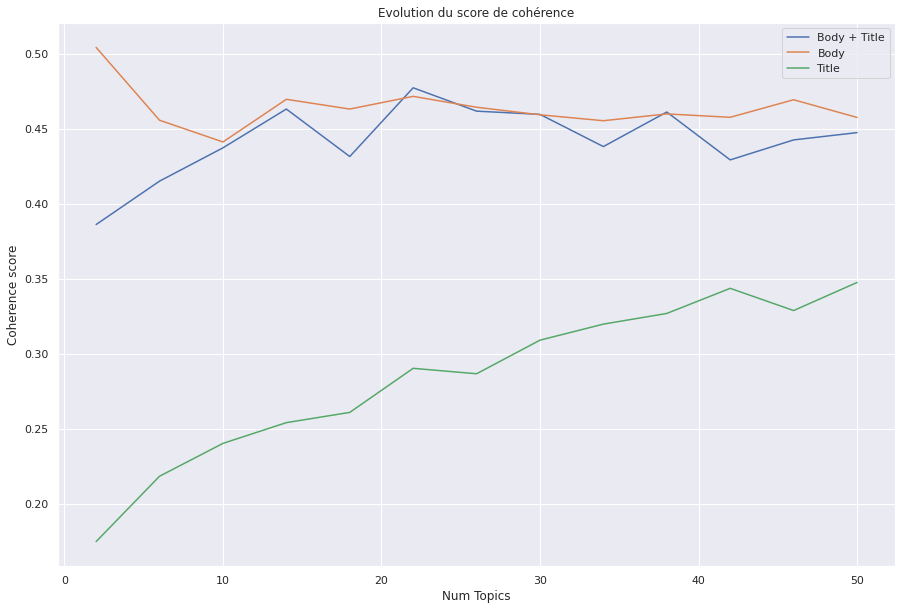

In [ ]:
limit = 51; start = 2; step = 4;
x = range(start, limit, step)
fig = plt.figure(figsize = (15, 10))
plt.plot(x, coherence_values_merged, label = 'Body + Title')
plt.plot(x, coherence_values_body, label = 'Body')
plt.plot(x, coherence_values_title, label = 'Title')
plt.title('Evolution du score de cohérence')
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend()
plt.show()

In [ ]:
#from __future__ import division
#import graphlab as gl
#import pyLDAvis
#import pyLDAvis.graphlab
#import pyLDAvis.gensim as gensimvis

#pyLDAvis.enable_notebook()

#LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(nb_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
#if 1 == 1:
#    LDAvis_prepared = pyLDAvis.gensim.prepare(model_list_merged, texts_merged, id2word_merged)
#    with open(LDAvis_data_filepath, 'wb') as f:
#        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
#with open(LDAvis_data_filepath, 'rb') as f:
#    LDAvis_prepared = pickle.load(f)
#pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(nb_topics) +'.html')
#LDAvis_prepared

ModuleNotFoundError: ignored